In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from scipy.integrate import trapezoid
import pandas as pd

In [2]:
def logistic_4p(x, min, max, ec50, h):
    return min + (max - min)/(1 + (x/ec50)**h)

In [3]:
def abs_ec50(min, max, ec50, h):
    return (((max - min)/(50 - min) - 1)**(1/h))*ec50

In [4]:
# define concentration series; 2-fold dilution
conc_range = [2e-8, 20e-6]
x = np.geomspace(*conc_range, 11)
x_fit = np.geomspace(*conc_range, 1000)
auc_conc = np.geomspace(1e-9, 5e-6, 1000) # AUC is quantified up to 5 uM

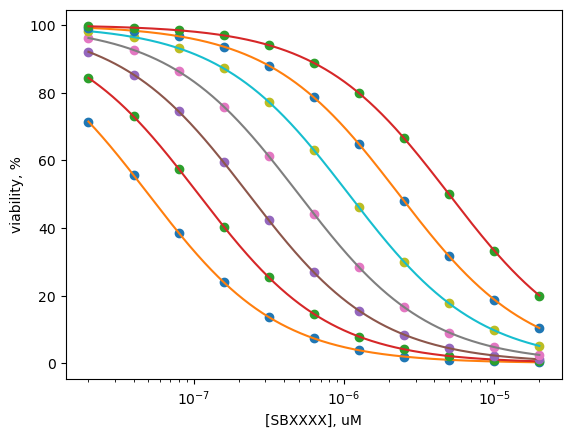

In [5]:
# all compounds are tested with the same dilution series
# create a range of perfect curves; quantify AUC over the whole concentration range
plt.xscale("log")
plt.xlabel('[SBXXXX], uM')
plt.ylabel('viability, %')
areas = []
for ec50 in np.geomspace(5e-8, 5e-6, 7):
    plt.plot(x, logistic_4p(x, 0, 100, ec50, 1), 'o')
    plt.plot(x_fit, logistic_4p(x_fit, 0, 100, ec50, 1))
    area = trapezoid(logistic_4p(auc_conc, 0, 100, ec50, 1), auc_conc)
    areas.append(area)

In [6]:
# to normalize over the tested concentration range and express AUC as a fractional value
area_control = 100*(auc_conc[-1] - auc_conc[0])

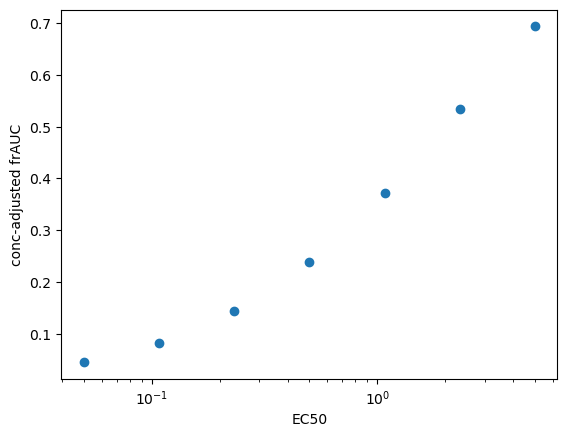

In [7]:
plt.xscale('log')
plt.xlabel('EC50')
plt.ylabel('conc-adjusted frAUC')
plt.plot(np.geomspace(5e-2, 5, 7),[area / area_control for area in areas], 'o')

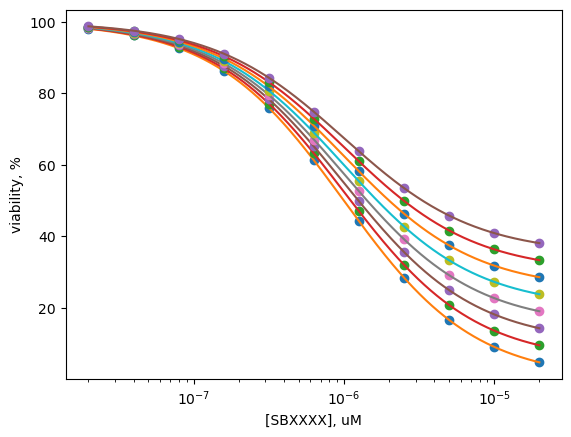

In [8]:
# bad curves: lower plateue differs for the same potency of 1 uM
# here we also quantify absolute ec50 values
plt.xscale("log")
plt.xlabel('[SBXXXX], uM')
plt.ylabel('viability, %')
areas = []
abs_ec50s = []
for min in np.linspace(0, 35, 8):
    plt.plot(x, logistic_4p(x, min, 100, 1e-6, 1), 'o')
    plt.plot(x_fit, logistic_4p(x_fit, min, 100, 1e-6, 1))
    area = trapezoid(logistic_4p(auc_conc, min, 100, 1e-6, 1), auc_conc)
    areas.append(area)
    abs_ec50s.append(abs_ec50(min, 100, 1e-6, 1))

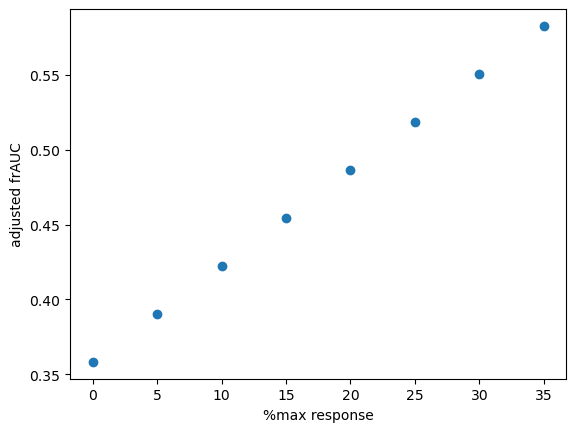

In [9]:
plt.xlabel('%max response')
plt.ylabel('adjusted frAUC')
plt.plot(np.linspace(0, 35, 8),[area / area_control for area in areas], 'o')
# AUC depends linearly from min - not a big surprise
# effect is not as strong, as for potency differences.
# AUC does not disciminate well between cytotox vs cytostatic/precipitation?
# Indeed it does not, since there are not enough concentration points at lower plateue region to inflate AUCs for bad curves

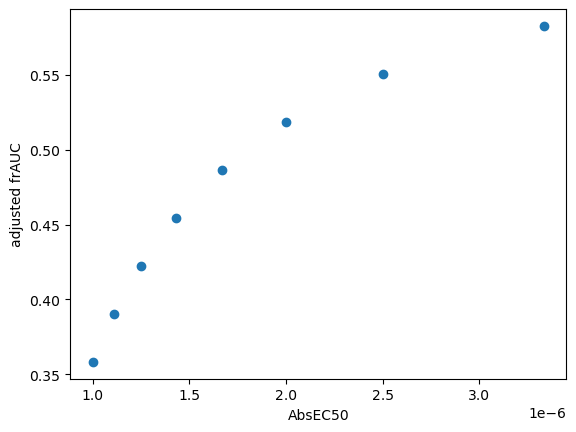

In [10]:
# A question - how does it correlate with the absolute EC50?
plt.xlabel('AbsEC50')
plt.ylabel('adjusted frAUC')
plt.plot(abs_ec50s,[area / area_control for area in areas], 'o')
# the effect is not that strong either.

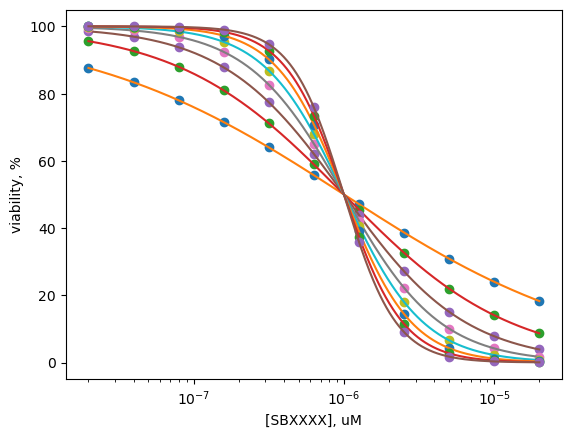

In [11]:
# bad curves: slope coefficient differs, potency same - 1 uM
plt.xscale("log")
plt.xlabel('[SBXXXX], uM')
plt.ylabel('viability, %')
areas = []
for h in np.linspace(0.5, 2.5, 8):
    plt.plot(x, logistic_4p(x, 0, 100, 1e-6, h), 'o')
    plt.plot(x_fit, logistic_4p(x_fit, 0, 100, 1e-6, h))
    area = trapezoid(logistic_4p(auc_conc, 0, 100, 1e-6, h), auc_conc)
    areas.append(area)

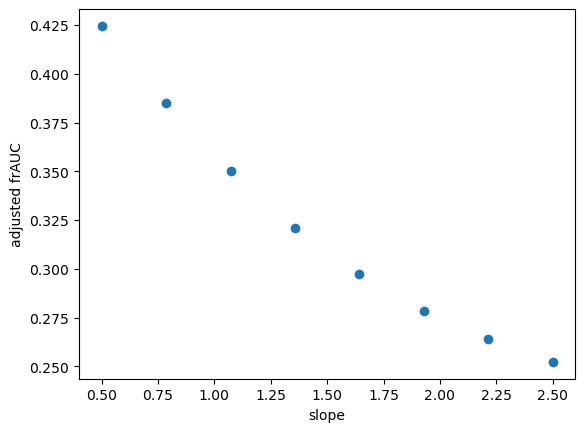

In [12]:
plt.xlabel('slope')
plt.ylabel('adjusted frAUC')
plt.plot(np.linspace(0.5, 2.5, 8),[area / area_control for area in areas], 'o')
# The effect of Hill-alike factor on AUC would be minimal if AUC is quantified 
# till higher conc, but for the shallow curves the values are inflated when the
# constrain is far from plateau
# If steep responses are ok for phenotyp readouts, remains a question.

In [13]:
# Let's generate a set of curves with values from a uniform distribution
# min from 0 to 50, h from 0.5 to 2.5, ec50 from 100 to 10000 nM

In [14]:
parameters = []
for i in range(0,1000):
    parameters.append([np.random.uniform(0,50), 100, np.random.uniform(1e-7,1e-5), np.random.uniform(0.5,2.5)])

In [15]:
all_data = pd.DataFrame()

In [16]:
all_data['Parameters'] = parameters

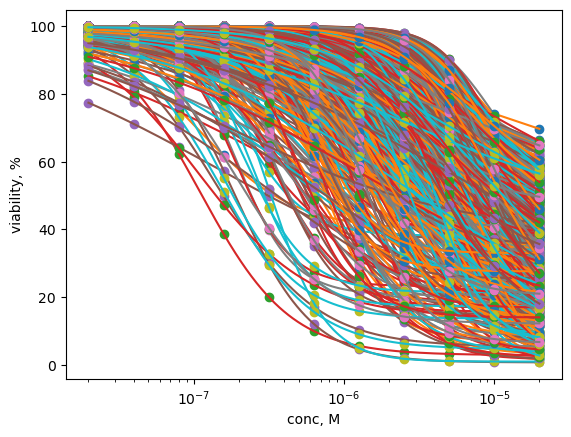

In [17]:
plt.xscale("log")
plt.xlabel('conc, M')
plt.ylabel('viability, %')
areas = []
for i in range(0,1000):
    plt.plot(x, logistic_4p(x, *all_data['Parameters'][i]), 'o')
    plt.plot(x_fit, logistic_4p(x_fit, *all_data['Parameters'][i]))
    area = trapezoid(logistic_4p(auc_conc, *all_data['Parameters'][i]), auc_conc)
    areas.append(area)

In [18]:
fr_areas = [area / area_control for area in areas]

In [19]:
all_data['Adjusted frAUC'] = fr_areas

In [20]:
def starred_abs_ec50(set):
    return abs_ec50(*set)

In [21]:
all_data['min'] = all_data['Parameters'].apply(lambda value: value[0])
all_data['max'] = all_data['Parameters'].apply(lambda value: value[1])
all_data['EC50'] = all_data['Parameters'].apply(lambda value: value[2])
all_data['h'] = all_data['Parameters'].apply(lambda value: value[3])
all_data['absEC50'] = all_data['Parameters'].apply(starred_abs_ec50)

In [22]:
all_data

Parameters  Adjusted frAUC  \
0    [16.739242564045625, 100, 2.8919037823432073e-...        0.670616   
1    [22.62658616146601, 100, 1.9032414394966734e-0...        0.589912   
2    [14.36330925610626, 100, 3.91820641024921e-06,...        0.735844   
3    [49.96882332213298, 100, 1.113432640340418e-06...        0.661072   
4    [38.8503555761689, 100, 1.9588455825591207e-06...        0.679460   
..                                                 ...             ...   
995  [8.781209624031566, 100, 9.965208324829252e-06...        0.903526   
996  [0.014540916529653947, 100, 8.230923975584607e...        0.800796   
997  [30.604032319541496, 100, 3.8212613553191305e-...        0.777129   
998  [6.436150338621383, 100, 1.3741195733980952e-0...        0.389806   
999  [10.991317074206297, 100, 8.831913765837189e-0...        0.807332   

           min  max      EC50         h   absEC50  
0    16.739243  100  0.000003  1.933086  0.000004  
1    22.626586  100  0.000002  1.661142  0.000003  
2    14.363309  100  0.000004  1.635447  0.000005  
3    49.968823  100  0.000001  1.647611  0.000098  
4    38.850356  100  0.000002  1.762115  0.000005  
..         ...  ...       ...       ...       ...  
995   8.781210  100  0.000010  1.606494  0.000011  
996   0.014541  100  0.000008  1.115725  0.000008  
997  30.604032  100  0.000004  1.540069  0.000007  
998   6.436150  100  0.000001  2.220624  0.000001  
999  10.991317  100  0.000009  0.952298  0.000011  

[1000 rows x 7 columns]

In [23]:
# top 10 compounds with lowest absEC50
top10_absec50 = all_data.sort_values(by='absEC50').head(10)

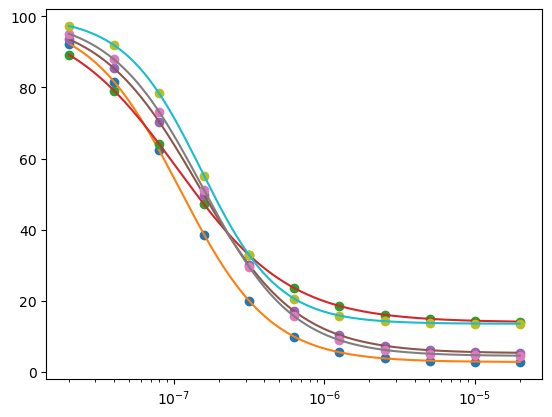

In [24]:
plt.xscale('log')
for i in range(0, 5):
    plt.plot(x, logistic_4p(x, *top10_absec50['Parameters'].iloc[i]), 'o')
    plt.plot(x_fit, logistic_4p(x_fit, *top10_absec50['Parameters'].iloc[i]))    

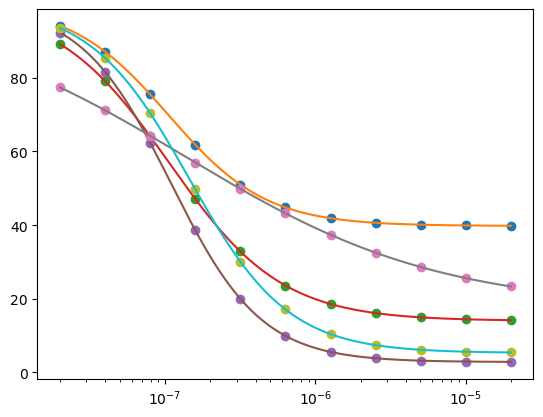

In [25]:
# top 10 compounds with lowest EC50
top10_ec50 = all_data.sort_values(by='EC50').head(10)
plt.xscale('log')
for i in range(0, 5):
    plt.plot(x, logistic_4p(x, *top10_ec50['Parameters'].iloc[i]), 'o')
    plt.plot(x_fit, logistic_4p(x_fit, *top10_ec50['Parameters'].iloc[i]))   

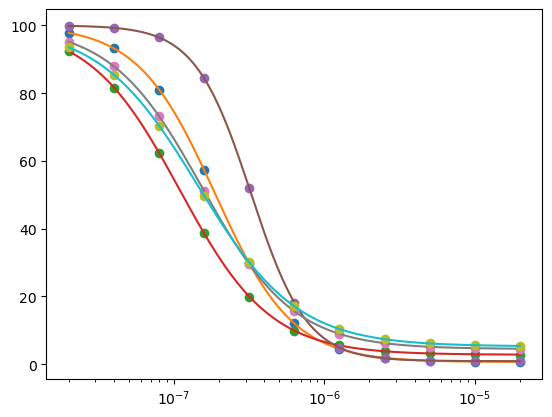

In [26]:
# top 10 compounds with lowest frAUC
top10_frauc = all_data.sort_values(by='Adjusted frAUC').head(10)
plt.xscale('log')
for i in range(0, 5):
    plt.plot(x, logistic_4p(x, *top10_frauc['Parameters'].iloc[i]), 'o')
    plt.plot(x_fit, logistic_4p(x_fit, *top10_frauc['Parameters'].iloc[i]))   

In [27]:
top10_ec50

Parameters  Adjusted frAUC  \
85   [39.76952572162447, 100, 1.055358545893122e-07...        0.429219   
616  [13.968037076344897, 100, 1.0624999878267444e-...        0.195657   
101  [2.7770785849888457, 100, 1.0940946928139353e-...        0.075004   
257  [17.347169418836273, 100, 1.355272884375146e-0...        0.354192   
467  [5.2479806303875, 100, 1.447048341253422e-07, ...        0.119292   
709  [13.542164996074424, 100, 1.5187887853811809e-...        0.182560   
514  [4.479031243868042, 100, 1.536540712075749e-07...        0.108889   
291  [23.166021535171932, 100, 1.8330173544486946e-...        0.270583   
407  [0.6374910332904216, 100, 1.8784685518168193e-...        0.073161   
963  [12.0804241710531, 100, 1.8894279888465189e-07...        0.191859   

           min  max          EC50         h       absEC50  
85   39.769526  100  1.055359e-07  1.339071  3.451369e-07  
616  13.968037  100  1.062500e-07  1.162256  1.408471e-07  
101   2.777079  100  1.094095e-07  1.445755  1.138205e-07  
257  17.347169  100  1.355273e-07  0.511299  3.118506e-07  
467   5.247981  100  1.447048e-07  1.320826  1.573777e-07  
709  13.542165  100  1.518789e-07  1.696918  1.829522e-07  
514   4.479031  100  1.536541e-07  1.431142  1.640680e-07  
291  23.166022  100  1.833017e-07  2.294012  2.404299e-07  
407   0.637491  100  1.878469e-07  1.684804  1.892830e-07  
963  12.080424  100  1.889428e-07  1.430178  2.292506e-07

In [28]:
top10_absec50

Parameters  Adjusted frAUC  \
101  [2.7770785849888457, 100, 1.0940946928139353e-...        0.075004   
616  [13.968037076344897, 100, 1.0624999878267444e-...        0.195657   
467  [5.2479806303875, 100, 1.447048341253422e-07, ...        0.119292   
514  [4.479031243868042, 100, 1.536540712075749e-07...        0.108889   
709  [13.542164996074424, 100, 1.5187887853811809e-...        0.182560   
407  [0.6374910332904216, 100, 1.8784685518168193e-...        0.073161   
963  [12.0804241710531, 100, 1.8894279888465189e-07...        0.191859   
291  [23.166021535171932, 100, 1.8330173544486946e-...        0.270583   
153  [20.56472515424515, 100, 1.9308210355497118e-0...        0.247682   
724  [21.37540019085874, 100, 2.196391415007797e-07...        0.264641   

           min  max          EC50         h       absEC50  
101   2.777079  100  1.094095e-07  1.445755  1.138205e-07  
616  13.968037  100  1.062500e-07  1.162256  1.408471e-07  
467   5.247981  100  1.447048e-07  1.320826  1.573777e-07  
514   4.479031  100  1.536541e-07  1.431142  1.640680e-07  
709  13.542165  100  1.518789e-07  1.696918  1.829522e-07  
407   0.637491  100  1.878469e-07  1.684804  1.892830e-07  
963  12.080424  100  1.889428e-07  1.430178  2.292506e-07  
291  23.166022  100  1.833017e-07  2.294012  2.404299e-07  
153  20.564725  100  1.930821e-07  2.322691  2.425543e-07  
724  21.375400  100  2.196391e-07  2.087352  2.869172e-07

In [29]:
top10_frauc

Parameters  Adjusted frAUC  \
407  [0.6374910332904216, 100, 1.8784685518168193e-...        0.073161   
101  [2.7770785849888457, 100, 1.0940946928139353e-...        0.075004   
489  [0.8915646795475185, 100, 3.2528351788000123e-...        0.096459   
514  [4.479031243868042, 100, 1.536540712075749e-07...        0.108889   
467  [5.2479806303875, 100, 1.447048341253422e-07, ...        0.119292   
709  [13.542164996074424, 100, 1.5187887853811809e-...        0.182560   
963  [12.0804241710531, 100, 1.8894279888465189e-07...        0.191859   
616  [13.968037076344897, 100, 1.0624999878267444e-...        0.195657   
502  [1.0727426051123035, 100, 5.764314240733049e-0...        0.221161   
794  [17.265917148953353, 100, 2.45724699198407e-07...        0.227908   

           min  max          EC50         h       absEC50  
407   0.637491  100  1.878469e-07  1.684804  1.892830e-07  
101   2.777079  100  1.094095e-07  1.445755  1.138205e-07  
489   0.891565  100  3.252835e-07  2.335880  3.277987e-07  
514   4.479031  100  1.536541e-07  1.431142  1.640680e-07  
467   5.247981  100  1.447048e-07  1.320826  1.573777e-07  
709  13.542165  100  1.518789e-07  1.696918  1.829522e-07  
963  12.080424  100  1.889428e-07  1.430178  2.292506e-07  
616  13.968037  100  1.062500e-07  1.162256  1.408471e-07  
502   1.072743  100  5.764314e-07  1.378692  5.855710e-07  
794  17.265917  100  2.457247e-07  2.347195  2.943252e-07

In [30]:
absec50_and_frauc = top10_absec50.index.intersection(top10_frauc.index)
absec50_and_frauc

Index([101, 616, 467, 514, 709, 407, 963], dtype='int64')

In [31]:
ec50_and_frauc = top10_ec50.index.intersection(top10_frauc.index)
ec50_and_frauc

Index([616, 101, 467, 709, 514, 407, 963], dtype='int64')

In [32]:
absec50_and_ec50 = top10_absec50.index.intersection(top10_ec50.index)
absec50_and_ec50

Index([101, 616, 467, 514, 709, 407, 963, 291], dtype='int64')